# Data Prepartion
- We have read all images in the chosen folders.
- We have converted all images to gray scale and resized them to 32 by 32.
- We have created 2 empty lists one to be filled with the flatten image array and the other with image label.
- We have converted the lists into numpy arrays.
- We have converted the arrays to a pandas data frame for further slicing by label.


In [1]:
import os
import skimage.io as skio
from skimage.transform import resize
from skimage import color
from skimage.color import rgb2gray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

f = r'/home/khadija/Downloads/A1/EnglishImg/English/Img/GoodImg/Bmb'
folders=['Sample051', 'Sample053', 'Sample017', 'Sample009']
labels=['o','q','G','8']
X=[]
y=[]
for ind,it in enumerate(folders):
    
    for file in os.listdir(f+"/"+it):
        f_img = f+"/"+it+"/"+file
        
        img = skio.imread(f_img)
        img = color.rgb2gray(img)
        img = resize(img,(32,32))
        X.append(img.flatten())
        y.append(labels[ind])
        
X=np.array(X)
y=np.array(y)
df=pd.DataFrame(X)
df['labels']=y

In [2]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,labels
0,0.572185,0.572185,0.572185,0.572185,0.572185,0.570213,0.570213,0.569931,0.569648,0.569648,...,0.596555,0.596273,0.589263,0.583942,0.581978,0.577208,0.571605,0.563479,0.563196,o
1,0.094966,0.099170,0.095531,0.085731,0.092741,0.089370,0.091327,0.091312,0.094385,0.099408,...,0.106180,0.106448,0.096938,0.088262,0.086580,0.098895,0.097474,0.091848,0.099691,o
2,0.211772,0.210388,0.201138,0.195527,0.194411,0.200305,0.199181,0.193004,0.184022,0.188777,...,0.194671,0.198875,0.200274,0.192996,0.194113,0.202789,0.202506,0.200825,0.203630,o
3,0.161831,0.194580,0.268205,0.402893,0.520236,0.586322,0.606488,0.601436,0.602827,0.601696,...,0.601644,0.588213,0.602798,0.635301,0.670327,0.648495,0.559176,0.428120,0.340186,o
4,0.754913,0.762191,0.746787,0.715698,0.707855,0.719902,0.724940,0.721301,0.717379,0.713458,...,0.728884,0.721591,0.710943,0.713198,0.716851,0.717685,0.721324,0.714596,0.714879,o


# Binary Classification

## O & Q model
- We have selected the rows which contains o and q labels, they are 202 images.
- We converted the data frame back to numpy array one for images and one for label.
- We splitted data randomly by sklearn into train, test and validation splits.
- The train split contains 161 images which is 60 % of images. 
- The test split contains 21 images which is 20 % of images. 
- The validation split contains 20 images which is 20 % of images. 

In [3]:
OQ=df[(df['labels']== 'o' )| (df['labels']== 'q') ]

In [4]:
X_OQ=np.array(OQ.loc[:, OQ.columns != 'labels'])
y_OQ=np.array(OQ.loc[:, 'labels'])

In [5]:
len(X_OQ)

202

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(X_OQ,y_OQ, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
print("train length is "+str(len(y_train))+" || test length is "+str(len(y_test))+" || validation length is "+str(len(y_valid)))

clf = LogisticRegression(random_state=0).fit(X_train, y_train)


train length is 161 || test length is 21 || validation length is 20


### Train Data metrics
- The model results in high accuracy and f1 score.

Accuracy is 0.9875776397515528
Precision is 1.0
Recall is 0.9555555555555556
F1 score is 0.9772727272727273


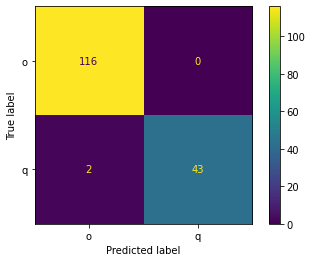

In [14]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
plot_confusion_matrix(clf, X_train, y_train)  ;
y_pred=clf.predict(X_train)

TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
Accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy is "+ str(Accuracy))
Precision = TP / (TP + FP)
print("Precision is "+str(Precision))
Recall= TP /( TP + FN)
print("Recall is "+str(Recall))
F1=2*(Precision*Recall)/(Precision+Recall)
print("F1 score is "+str(F1))


#### Roc Curve
- AUC is 99%
- An AUC of 99% means that if we take two data points from the q and o classes, there is a 99% chance that the model will correctly rank order them, hence the positive class has a greater prediction probability than the negative class.


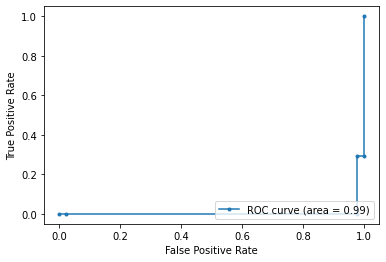

In [13]:
model_probs = clf.predict_proba(X_train)
y_score = model_probs[:, 1]
fpr, tpr, _ = roc_curve([0 if i == 'q' else 1 for i in y_train], y_score)
auc = roc_auc_score(y_train, y_score)

plt.plot(fpr, tpr, marker='.', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.legend(loc='lower right');


### Test Metrics
- The model performs badly in test data, hence we admit that the model overfits.
- The accuracy is fair but the f1 score is very low.

Accuracy is 0.7142857142857143
Precision is 0.5
Recall is 0.16666666666666666
F1 score is 0.25


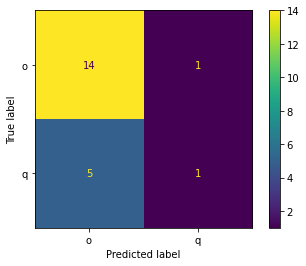

In [15]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  ;
y_pred=clf.predict(X_test)

TN, FP, FN, TP = confusion_matrix(y_test,y_pred).ravel()
Accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy is "+ str(Accuracy))
Precision = TP / (TP + FP)
print("Precision is "+str(Precision))
Recall= TP /( TP + FN)
print("Recall is "+str(Recall))
F1=2*(Precision*Recall)/(Precision+Recall)
print("F1 score is "+str(F1))


#### ROC Curve
- AUC is 40 %
- An AUC of 40% means that if we take two data points from the q and o classes, there is a 40% chance that the model will correctly rank order them, hence the positive class has a greater prediction probability than the negative class.
- if AUC is less than 50 %, hence the model never learns.


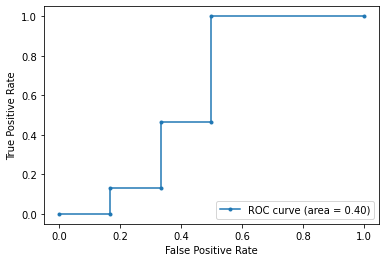

In [16]:
model_probs = clf.predict_proba(X_test)
y_score = model_probs[:, 1]
fpr, tpr, _ = roc_curve([0 if i == 'q' else 1 for i in y_test], y_score)
auc = roc_auc_score(y_test, y_score)

plt.plot(fpr, tpr, marker='.', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.legend(loc='lower right');


## G & 8 model
- We have selected the rows which contains G and 8 labels, they are 175 images.
- We converted the data frame back to numpy array one for images and one for label.
- We splitted data randomly by sklearn into train, test and validation splits.
- The train split contains 140 images which is 60 % of images. 
- The test split contains 18 images which is 20 % of images. 
- The validation split contains 17 images which is 20 % of images.

In [17]:
G8=df[(df['labels']== 'G' )| (df['labels']== '8') ]
X_G8=np.array(G8.loc[:, G8.columns != 'labels'])
y_G8=np.array(G8.loc[:, 'labels'])
len(X_G8)

175

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(X_G8,y_G8, train_size=0.8)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
print("train length is "+str(len(y_train))+" || test length is "+str(len(y_test))+" || validation length is "+str(len(y_valid)))
clf = LogisticRegression(random_state=0).fit(X_train, y_train)



train length is 140 || test length is 18 || validation length is 17


### Train Data Metrics
- Again the model results in high accuracy and f1 score.

Accuracy is 0.9714285714285714
Precision is 0.9666666666666667
Recall is 1.0
F1 score is 0.983050847457627


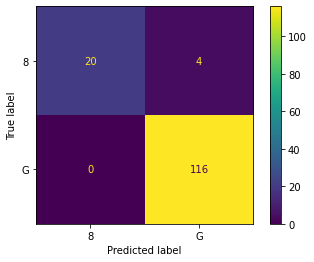

In [20]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(clf, X_train, y_train)  ;
y_pred=clf.predict(X_train)

TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()
Accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy is "+ str(Accuracy))
Precision = TP / (TP + FP)
print("Precision is "+str(Precision))
Recall= TP /( TP + FN)
print("Recall is "+str(Recall))
F1=2*(Precision*Recall)/(Precision+Recall)
print("F1 score is "+str(F1))


#### ROC Curve
- In addition to a high AUC value.

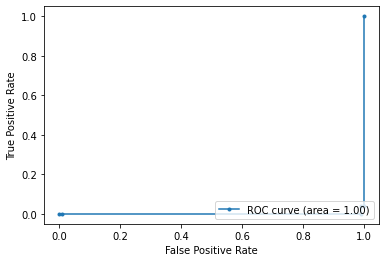

In [21]:
model_probs = clf.predict_proba(X_train)
y_score = model_probs[:, 1]
fpr, tpr, _ = roc_curve([0 if i == 'G' else 1 for i in y_train], y_score)
auc = roc_auc_score(y_train, y_score)

plt.plot(fpr, tpr, marker='.', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.legend(loc='lower right');


### Test Data Metrics
- Accuracy in test data and F1 score is fair.

Accuracy is 0.7777777777777778
Precision is 0.8235294117647058
Recall is 0.9333333333333333
F1 score is 0.8749999999999999


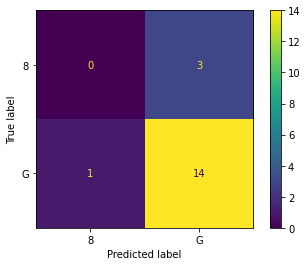

In [22]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  ;
y_pred=clf.predict(X_test)

TN, FP, FN, TP = confusion_matrix(y_test,y_pred).ravel()
Accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy is "+ str(Accuracy))
Precision = TP / (TP + FP)
print("Precision is "+str(Precision))
Recall= TP /( TP + FN)
print("Recall is "+str(Recall))
F1=2*(Precision*Recall)/(Precision+Recall)
print("F1 score is "+str(F1))


#### Roc  Curve
- AUC is again under 50 % which is definitely overfitting.
- The model cannot distiguish between the two classes.

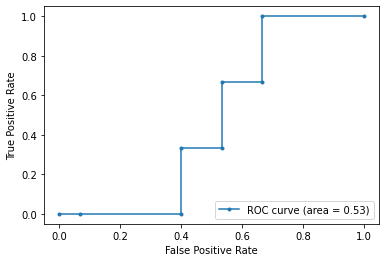

In [23]:
model_probs = clf.predict_proba(X_test)
y_score = model_probs[:, 1]
fpr, tpr, _ = roc_curve([0 if i == 'G' else 1 for i in y_test], y_score)
auc = roc_auc_score(y_test, y_score)

plt.plot(fpr, tpr, marker='.', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.legend(loc='lower right');


# Multi-Classification
- We have selected all images which are 377 images.
- We splitted data randomly by sklearn into train, test and validation splits.
- The train split contains 226 images which is 60 % of images. 
- The test split contains 76 images which is 20 % of images. 
- The validation split contains 75 images which is 20 % of images.

In [53]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.6)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)
print("images length is "+ str(len(X)))
print("train length is "+str(len(y_train))+" || test length is "+str(len(y_test))+" || validation length is "+str(len(y_valid)))

clf = OneVsRestClassifier((LogisticRegression(multi_class='multinomial', solver='lbfgs'))).fit(X_train, y_train)


images length is 377
train length is 226 || test length is 76 || validation length is 75


### Train Data Metrics
- class 8 and q has the most high recall value, then we are going to use it in one vs rest in roc curve.

Accuracy  for class 8 is 0.9902912621359223
Precision for class 8 is 0.9090909090909091
Recall    for class 8 is 1.0
F1 score  for class 8 is 0.9523809523809523

Accuracy  for class G is 0.927536231884058
Precision for class G is 0.946236559139785
Recall    for class G is 0.946236559139785
F1 score  for class G is 0.946236559139785

Accuracy  for class o is 0.9337748344370861
Precision for class o is 0.9493670886075949
Recall    for class o is 0.9333333333333333
F1 score  for class o is 0.9375000000000001

Accuracy  for class q is 1.0
Precision for class q is 0.8235294117647058
Recall    for class q is 1.0
F1 score  for class q is 1.0


Overall Accuracy  is 0.9680696661828737

AVG     Recall    is 0.9680406212664278

AVG     Precision is 0.9511736392095722

Micro   F1 Score  is 0.9513274336283186
Macro   F1 Score  is 0.9590293778801844


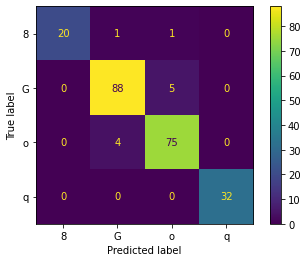

In [54]:
plot_confusion_matrix(clf, X_train, y_train)  ;
y_pred=clf.predict(X_train)
TP_8,TP_G,TP_o,TP_q=confusion_matrix(y_train,y_pred).diagonal()
FN_8,FN_G,FN_o,FN_q=confusion_matrix(y_train,y_pred).sum(axis=0)-confusion_matrix(y_train,y_pred).diagonal()
FP_8,FP_G,FP_o,FP_q=confusion_matrix(y_train,y_pred).sum(axis=1)-confusion_matrix(y_train,y_pred).diagonal()
TN_8,TN_G,TN_o,TN_q=confusion_matrix(y_train,y_pred).sum()-(confusion_matrix(y_train,y_pred).sum(axis=0)+confusion_matrix(y_train,y_pred).sum(axis=1))

Accuracy_8 = (TP_8 + TN_8) / (TP_8 + TN_8 + FP_8 + FN_8)
print("Accuracy  for class 8 is "+ str(Accuracy_8))
Precision_8 = TP_8 / (TP_8 + FP_8)
print("Precision for class 8 is "+str(Precision_8))
Recall_8= TP_8 /( TP_8 + FN_8)
print("Recall    for class 8 is "+str(Recall_8))
F1_8=2*(Precision_8*Recall_8)/(Precision_8+Recall_8)
print("F1 score  for class 8 is "+str(F1_8)+"\n")
#---------------------------------------------
Accuracy_G = (TP_G + TN_G) / (TP_G + TN_G + FP_G + FN_G)
print("Accuracy  for class G is "+ str(Accuracy_G))
Precision_G = TP_G / (TP_G + FP_G)
print("Precision for class G is "+str(Precision_G))
Recall_G= TP_G /( TP_G + FN_G)
print("Recall    for class G is "+str(Recall_G))
F1_G=2*(Precision_G*Recall_G)/(Precision_G+Recall_G)
print("F1 score  for class G is "+str(F1_G)+"\n")
#------------------------------------------------
Accuracy_o = (TP_o + TN_o) / (TP_o + TN_o + FP_o + FN_o)
print("Accuracy  for class o is "+ str(Accuracy_o))
Precision_o = TP_o / (TP_o + FP_o)
print("Precision for class o is "+str(Precision_o))
Recall_o= TP_o /( TP_o + FN_o)
print("Recall    for class o is "+str(Recall))
F1_o=2*(Precision_o*Recall_o)/(Precision_o+Recall_o)
print("F1 score  for class o is "+str(F1_o)+"\n")
#------------------------------------------
Accuracy_q = (TP_q + TN_q) / (TP_q + TN_q + FP_q + FN_q)
print("Accuracy  for class q is "+ str(Accuracy_q))
Precision_q = TP_q / (TP_q + FP_q)
print("Precision for class q is "+str(Precision))
Recall_q= TP_q /( TP_q + FN_q)
print("Recall    for class q is "+str(Recall_q))
F1_q=2*(Precision_q*Recall_q)/(Precision_q+Recall_q)
print("F1 score  for class q is "+str(F1_q)+"\n"+"\n")
# ----------------
print("Overall Accuracy  is "+str((TP_8+TP_G+TP_o+TP_q+TN_8+TN_G+TN_o+TN_q)/
                          (TP_8+TP_G+TP_o+TP_q+TN_8+TN_G+TN_o+TN_q+FN_8+FN_G+FN_o+FN_q+FP_8+FP_G+FP_o+FP_q))+"\n" )
print("AVG     Recall    is "+str((Recall_8+Recall_G+Recall_o+Recall_q)/4)+"\n")
print("AVG     Precision is "+str((Precision_8+Precision_G+Precision_o+Precision_q)/4)+"\n")
micro_precision=(TP_8+TP_G+TP_o+TP_q)/(TP_8+TP_G+TP_o+TP_q+FN_8+FN_G+FN_o+FN_q)

micro_recall=(TP_8+TP_G+TP_o+TP_q)/(TP_8+TP_G+TP_o+TP_q+FP_8+FP_G+FP_o+FP_q)

print("Micro   F1 Score  is "+str(2*(micro_precision*micro_recall)/(micro_precision+micro_recall)))
print("Macro   F1 Score  is "+str((F1_8+F1_G+F1_o+F1_q)/4))

#### Roc Curve
- AUC is 85%
- An AUC of 85% means that if we take two data points from the q and 8 classes and from the rest classes G and o, there is a 85% chance that the model will correctly rank order them, hence the positive class has a greater prediction probability than the negative class.


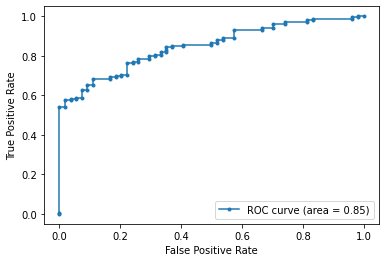

In [55]:
model_probs = clf.predict_proba(X_train)
y_score = model_probs[:, 1]
fpr, tpr, _ = roc_curve([0 if( i == 'q')|(i=='8') else 1 for i in y_train], y_score)
auc = roc_auc_score([0 if( i == 'q')|(i=='8') else 1 for i in y_train], y_score)

plt.plot(fpr, tpr, marker='.', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.legend(loc='lower right');


### Test Data Metrics

Accuracy  for class 8 is 0.868421052631579
Precision for class 8 is 0.0
Recall    for class 8 is 0.0
F1 score  for class 8 is nan

Accuracy  for class G is 0.5344827586206896
Precision for class G is 0.6666666666666666
Recall    for class G is 0.5
F1 score  for class G is 0.5714285714285715

Accuracy  for class o is 0.5263157894736842
Precision for class o is 0.5757575757575758
Recall    for class o is 0.9333333333333333
F1 score  for class o is 0.5846153846153846

Accuracy  for class q is 0.8648648648648649
Precision for class q is 0.8235294117647058
Recall    for class q is 0.6666666666666666
F1 score  for class q is 0.28571428571428575


Overall Accuracy  is 0.720754716981132

AVG     Recall    is 0.44010416666666663

AVG     Precision is 0.3560606060606061

Micro   F1 Score  is 0.5131578947368421
Macro   F1 Score  is nan


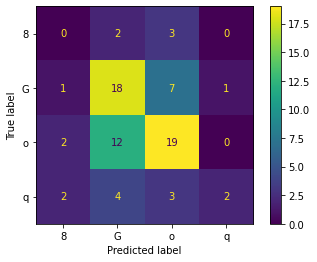

In [56]:
plot_confusion_matrix(clf, X_test, y_test)  ;
y_pred=clf.predict(X_test)
TP_8,TP_G,TP_o,TP_q=confusion_matrix(y_test,y_pred).diagonal()
FN_8,FN_G,FN_o,FN_q=confusion_matrix(y_test,y_pred).sum(axis=0)-confusion_matrix(y_test,y_pred).diagonal()
FP_8,FP_G,FP_o,FP_q=confusion_matrix(y_test,y_pred).sum(axis=1)-confusion_matrix(y_test,y_pred).diagonal()
TN_8,TN_G,TN_o,TN_q=confusion_matrix(y_test,y_pred).sum()-(confusion_matrix(y_test,y_pred).sum(axis=0)+confusion_matrix(y_test,y_pred).sum(axis=1))

Accuracy_8 = (TP_8 + TN_8) / (TP_8 + TN_8 + FP_8 + FN_8)
print("Accuracy  for class 8 is "+ str(Accuracy_8))
Precision_8 = TP_8 / (TP_8 + FP_8)
print("Precision for class 8 is "+str(Precision_8))
Recall_8= TP_8 /( TP_8 + FN_8)
print("Recall    for class 8 is "+str(Recall_8))
F1_8=2*(Precision_8*Recall_8)/(Precision_8+Recall_8)
print("F1 score  for class 8 is "+str(F1_8)+"\n")
#---------------------------------------------
Accuracy_G = (TP_G + TN_G) / (TP_G + TN_G + FP_G + FN_G)
print("Accuracy  for class G is "+ str(Accuracy_G))
Precision_G = TP_G / (TP_G + FP_G)
print("Precision for class G is "+str(Precision_G))
Recall_G= TP_G /( TP_G + FN_G)
print("Recall    for class G is "+str(Recall_G))
F1_G=2*(Precision_G*Recall_G)/(Precision_G+Recall_G)
print("F1 score  for class G is "+str(F1_G)+"\n")
#------------------------------------------------
Accuracy_o = (TP_o + TN_o) / (TP_o + TN_o + FP_o + FN_o)
print("Accuracy  for class o is "+ str(Accuracy_o))
Precision_o = TP_o / (TP_o + FP_o)
print("Precision for class o is "+str(Precision_o))
Recall_o= TP_o /( TP_o + FN_o)
print("Recall    for class o is "+str(Recall))
F1_o=2*(Precision_o*Recall_o)/(Precision_o+Recall_o)
print("F1 score  for class o is "+str(F1_o)+"\n")
#------------------------------------------
Accuracy_q = (TP_q + TN_q) / (TP_q + TN_q + FP_q + FN_q)
print("Accuracy  for class q is "+ str(Accuracy_q))
Precision_q = TP_q / (TP_q + FP_q)
print("Precision for class q is "+str(Precision))
Recall_q= TP_q /( TP_q + FN_q)
print("Recall    for class q is "+str(Recall_q))
F1_q=2*(Precision_q*Recall_q)/(Precision_q+Recall_q)
print("F1 score  for class q is "+str(F1_q)+"\n"+"\n")
# ----------------
print("Overall Accuracy  is "+str((TP_8+TP_G+TP_o+TP_q+TN_8+TN_G+TN_o+TN_q)/
                          (TP_8+TP_G+TP_o+TP_q+TN_8+TN_G+TN_o+TN_q+FN_8+FN_G+FN_o+FN_q+FP_8+FP_G+FP_o+FP_q))+"\n" )
print("AVG     Recall    is "+str((Recall_8+Recall_G+Recall_o+Recall_q)/4)+"\n")
print("AVG     Precision is "+str((Precision_8+Precision_G+Precision_o+Precision_q)/4)+"\n")
micro_precision=(TP_8+TP_G+TP_o+TP_q)/(TP_8+TP_G+TP_o+TP_q+FN_8+FN_G+FN_o+FN_q)

micro_recall=(TP_8+TP_G+TP_o+TP_q)/(TP_8+TP_G+TP_o+TP_q+FP_8+FP_G+FP_o+FP_q)

print("Micro   F1 Score  is "+str(2*(micro_precision*micro_recall)/(micro_precision+micro_recall)))
print("Macro   F1 Score  is "+str((F1_8+F1_G+F1_o+F1_q)/4))

#### Roc Curve
- AUC is 57%
- The model is almost distinguish between the 2 data points represented by q&8 and G&o saying that the chance for each data point is 57% which is known without modeling.
- The model keeps overfitting in data was not seen before.
- We may suggest to increase the number of images used to avoid overfitting.


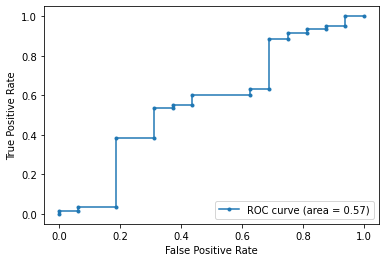

In [57]:
model_probs = clf.predict_proba(X_test)
y_score = model_probs[:, 1]
fpr, tpr, _ = roc_curve([0 if( i == 'q')|(i=='8') else 1 for i in y_test], y_score)
auc = roc_auc_score([0 if( i == 'q')|(i=='8') else 1 for i in y_test], y_score)

plt.plot(fpr, tpr, marker='.', label= 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.legend(loc='lower right');
